In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
automobile_df = pd.read_csv('datasets/regression/auto-mpg-processed.csv')
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
32,32.0,4,91.0,67,1965,15.7,41
208,32.0,4,135.0,84,2295,11.6,41
349,32.4,4,107.0,72,2290,17.0,43
91,14.0,8,455.0,225,4425,10.0,53
101,31.0,4,71.0,65,1773,19.0,52


In [9]:
from sklearn.model_selection import train_test_split
X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
x_train.shape

(313, 1)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
linear_model = model.fit(x_train, y_train)
# linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [16]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.5796008231553404


In [17]:
y_pred = linear_model.predict(x_test)

In [18]:
from sklearn.metrics import r2_score
print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.6869313568525319


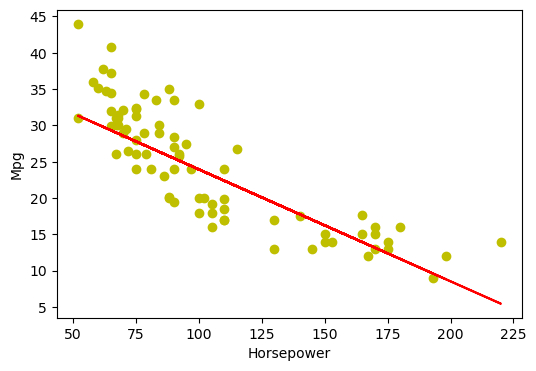

In [20]:
fig, ax = plt.subplots(figsize = (6,4))
plt.scatter(x_test, y_test, color='y')
plt.plot(x_test, y_pred, color='r')

plt.xlabel("Horsepower")
plt.ylabel("Mpg")
plt.show()


In [21]:
X= automobile_df[['age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
linear_model = model.fit(x_train, y_train)

print("Training score: ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

r2_scr = r2_score(y_test, y_pred)

print("Testing score: ", r2_scr)

Training score:  0.3037802438691267
Testing score:  0.4378028969984066


In [39]:
X = automobile_df[['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders','age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [40]:
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
linear_model = model.fit(x_train, y_train)

print("Training: ", linear_model.score(x_train, y_train))

Training:  0.8046572943633156


In [ ]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_(), predictors).sort_values()
print(coef)

In [42]:
y_pred = linear_model.predict(x_test)

print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.8220955627018414


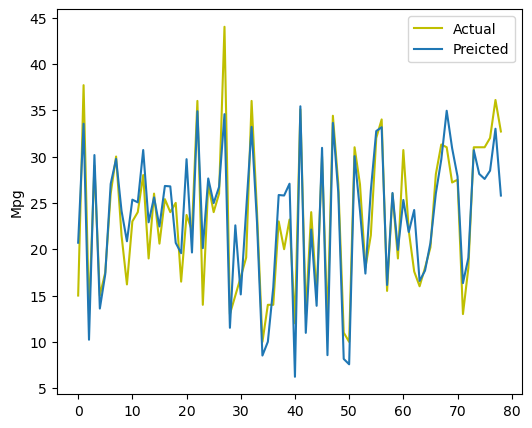

In [43]:
fig, ax = plt.subplots(figsize = (6, 5))

plt.plot(y_test.values, color='y', label="Actual")
plt.plot( y_pred, label="Preicted")
plt.ylabel("Mpg")
plt.legend()
plt.show()
